In [1]:
import pandas as pd
import json
import numpy as np


from imagedata_NeoroScan import medical_train, medical_test, display_img
from image_loading import * 
print("All Prerequisites Loaded Successfully")

Found 3157
Successfully loaded 3157
Found 3453
Successfully loaded 3453
Found 711
Successfully loaded 711
Found 1424
Successfully loaded 1424
Total Training Images: 8745
All Training Images Loaded Successfully!
Found 136
Successfully loaded 136
Found 140
Successfully loaded 140
Found 100
Successfully loaded 100
Found 136
Successfully loaded 136
Total Training Images: 8745
All Training Images Loaded Successfully!
Total Testing Images: 512
All Testing Images loaded successfully!
2.9.1+cpu
2.2.4
11.1.0
 13           RESUME                   0

 14           LOAD_GLOBAL              0 (img)
              LOAD_ATTR                2 (open)
              PUSH_NULL
              LOAD_FAST                0 (image_path)
              CALL                     1
              STORE_FAST               1 (image)

 15           LOAD_GLOBAL              4 (torch)
              LOAD_ATTR                6 (from_numpy)
              PUSH_NULL
              LOAD_GLOBAL              8 (np)
              LO

In [2]:
print("Medical Training Sets =",len(medical_train))
print("Medical Testing Sets =",len(medical_test))

Medical Training Sets = 4
Medical Testing Sets = 4


In [3]:
print("Structure of Training Images :")
str_training = structure_img(medical_train)

Structure of Training Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 3157
    Type: <class 'PIL.Image.Image'>


In [4]:
print("Structure of Testing Images :")
str_testing = structure_img(medical_test)

Structure of Testing Images :
Type: <class 'list'>
Lenght: 4
  Type: <class 'list'>
  Lenght: 136
    Type: <class 'PIL.Image.Image'>


Training Images...


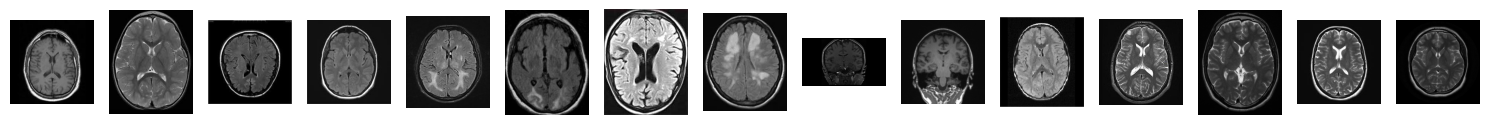

In [5]:
print("Training Images...")
train_image = display_img(medical_train, 0, 15)

Testing Images...


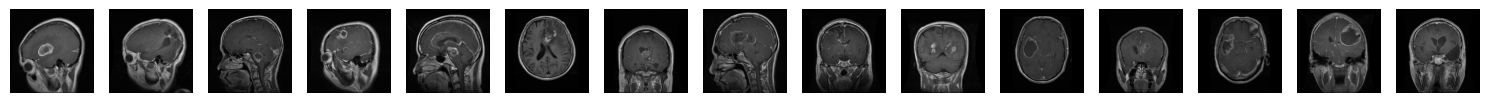

In [6]:
print("Testing Images...")
test_image = display_img(medical_test, 0, 15)


In [7]:
import torch, torchvision.transforms as T
from torchvision import models

model = models.resnet50(pretrained = True)
model = torch.nn.Sequential(*list(model.children()))[:-1]

C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Tanmay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
for img_var in medical_train:
    print("vectorising train set...")
    print("="*20)
    vector_train = []

    for img in img_var[:200]:
        
       
        prep = prep = T.Compose([T.Resize((256,256)), T.CenterCrop((224,224)),T.Grayscale(num_output_channels= 3), T.ToTensor()])
        tensor = prep(img).unsqueeze(0)

        vector_tr = model(tensor)

vectorising train set...
vectorising train set...
vectorising train set...
vectorising train set...


In [9]:
for img_var in medical_test:
    print("vectorising test set...")
    print("="*20)
    vector_test = []

    for img in img_var[:200]:
        prep = T.Compose([T.Resize((256,256)), T.CenterCrop((224,224)),T.Grayscale(num_output_channels= 3), T.ToTensor()])
        tensor = prep(img).unsqueeze(0)

        vector_ts = model(tensor)

vectorising test set...
vectorising test set...
vectorising test set...
vectorising test set...


In [10]:
print("Vectorized Training Set:", vector_tr, sep ="\n")
print(type(vector_tr))


Vectorized Training Set:
tensor([[[[0.3265]],

         [[0.5237]],

         [[0.4463]],

         ...,

         [[0.3179]],

         [[0.4874]],

         [[0.3135]]]], grad_fn=<MeanBackward1>)
<class 'torch.Tensor'>


In [11]:
print("Vectorized Testing Set:", vector_ts, sep="\n")
print(type(vector_ts))


Vectorized Testing Set:
tensor([[[[0.3917]],

         [[0.5261]],

         [[0.5262]],

         ...,

         [[0.3648]],

         [[0.4765]],

         [[0.3650]]]], grad_fn=<MeanBackward1>)
<class 'torch.Tensor'>


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators= 200,

    max_depth=10,
    verbose= 20
)
print("Random Forest Classiffier has been initiated =", rfc)

Random Forest Classiffier has been initiated = RandomForestClassifier(max_depth=10, n_estimators=200, verbose=20)


In [13]:
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [14]:
print("Vectorised Data's Type", sep="/n")
print(type(vector_tr), type(vector_ts))
print("Vectorised Data's Shape", sep="/n")
print("Training Value =",vector_tr.shape,"Testing Value =", vector_ts.shape )
print("Vectorised Data's Unsqueezed Shape ", sep="/n")
print("Training UnSqueezed =", vector_tr.unsqueeze(0).shape, "Testing Unsqueezed =", vector_ts.unsqueeze(0).shape)


Vectorised Data's Type
<class 'torch.Tensor'> <class 'torch.Tensor'>
Vectorised Data's Shape
Training Value = torch.Size([1, 2048, 1, 1]) Testing Value = torch.Size([1, 2048, 1, 1])
Vectorised Data's Unsqueezed Shape 
Training UnSqueezed = torch.Size([1, 1, 2048, 1, 1]) Testing Unsqueezed = torch.Size([1, 1, 2048, 1, 1])


In [16]:
print("Structure of Vector Train :")
str_training_v = structure_img(vector_tr)

print("Structure of Vector Testing :")
str_testing_v = structure_img(vector_ts)

Structure of Vector Train :
Type: <class 'torch.Tensor'>
Structure of Vector Testing :
Type: <class 'torch.Tensor'>


In [36]:
x_tr = vector_tr.view(vector_tr.size(0), -1)
x_ts = vector_ts.view(vector_ts.size(0), -1)

y_tr = torch.tensor([0] * x_tr.shape[0])
y_ts = torch.tensor([1] * x_tr.shape[0])

training_material = x_tr , x_ts, y_tr, y_ts
print(training_material)

(tensor([[0.3265, 0.5237, 0.4463,  ..., 0.3179, 0.4874, 0.3135]],
       grad_fn=<ViewBackward0>), tensor([[0.3917, 0.5261, 0.5262,  ..., 0.3648, 0.4765, 0.3650]],
       grad_fn=<ViewBackward0>), tensor([0]), tensor([1]))
